In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#priklad 1.

last_vectA = np.array([0.5, 0.5])
last_vectB = np.array([1, 0])
last_vectC = np.array([0, 1])
current_vect = np.zeros(2)
valuesA = np.zeros(100)
valuesB = np.zeros(100)
valuesC = np.zeros(100)
valuesA[0] = 0.5
valuesB[0] = 0
valuesC[0] = 1

Q = np.array([[0.8, 0.2], [0.1, 0.9]])

for i in range(1,100):
    current_vect[0] = Q[1, 0] * last_vectA[1] + Q[0, 0] * last_vectA[0]
    current_vect[1] = 1 - current_vect[0]
    valuesA[i] = current_vect[1]
    last_vectA = current_vect.copy()

    current_vect[0] = Q[1, 0] * last_vectB[1] + Q[0, 0] * last_vectB[0]
    current_vect[1] = 1 - current_vect[0]
    valuesB[i] = current_vect[1]
    last_vectB = current_vect.copy()

    current_vect[0] = Q[1, 0] * last_vectC[1] + Q[0, 0] * last_vectC[0]
    current_vect[1] = 1 - current_vect[0]
    valuesC[i] = current_vect[1]
    last_vectC = current_vect.copy()

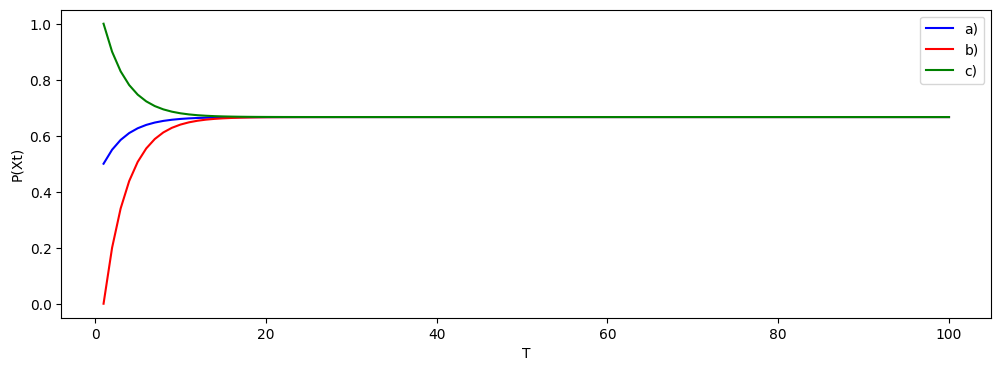

In [27]:
x = range(1, 101)

plt.figure(figsize=(12, 4))

plt.plot(x, valuesA, label="a)", color="blue")
plt.plot(x, valuesB, label="b)", color="red")
plt.plot(x, valuesC, label="c)", color="green")

plt.xlabel("T")
plt.ylabel("P(Xt)")
plt.legend()

plt.show()

In [34]:
mol = np.load("y.npy")
print(mol)

values = np.zeros(100)
values[0] = 0.5

for i in range(1,100):
    if 


[37 50 40 68 63 77 54 45 47 28 55 51 31 45 45 72 57 56 38 48 48 49 62 58
 56 52 51 71 62 57 56 57 56 63 53 54 60 57 37 60 52 49 53 62 65 52 63 61
 50 46 49 61 64 49 50 49 50 67 45 65 56 38 66 48 59 58 38 36 55 69 43 50
 55 54 41 46 32 47 34 64 59 42 58 54 80 66 58 36 36 41 44 38 48 43 54 50
 45 57 46 57 48]


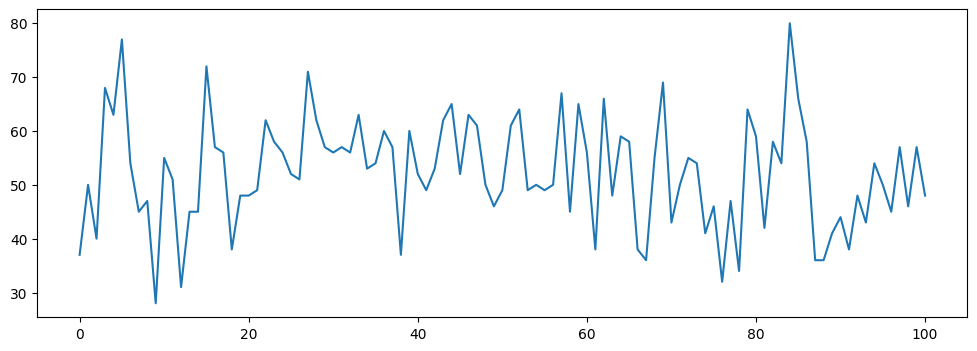

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(range(101), mol)

plt.show()